In [32]:
import torch
from PIL import Image
import numpy as np
from mmseg.apis import init_model, inference_model,MMSegInferencer
from mmseg.datasets.grass import GrassDataset
from mmseg.visualization import SegLocalVisualizer
from mmengine.structures import PixelData
from matplotlib import pyplot as plt

In [ ]:
device = "cpu"
image_path = "data/grass/img_dir/val/24.tif"
mask_path = "data/grass/ann_dir/val/24.tif"
config_path = 'work_dirs/swin-tiny-patch4-window7_upernet/swin-tiny-patch4-window7_upernet.py'
checkpoint_path = 'work_dirs/swin-tiny-patch4-window7_upernet/best_mIoU_iter_19320.pth'
classes = GrassDataset.METAINFO['classes']
palette = GrassDataset.METAINFO['palette']

In [31]:
image = np.array(Image.open(image_path))
mask = np.array(Image.open(mask_path))

In [26]:
seg_local_visualizer = SegLocalVisualizer(
    vis_backends=[dict(type="LocalVisBackend")],classes=classes,palette=palette
)

/home/zouxuechao/miniconda3/envs/mmseg/lib/python3.9/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


In [33]:
sem_seg = torch.from_numpy(mask)
gt_sem_seg_data = dict(data=sem_seg)
gt_sem_seg = PixelData(**gt_sem_seg_data)
color_image_gt = seg_local_visualizer._draw_sem_seg(image,gt_sem_seg,classes=classes,palette=palette)

/home/zouxuechao/miniconda3/envs/mmseg/lib/python3.9/site-packages/mmengine/structures/pixel_data.py:83: UserWarning: The shape of value will convert from torch.Size([256, 256]) to torch.Size([1, 256, 256])
  warnings.warn('The shape of value will convert from '


In [35]:
inferencer = MMSegInferencer(model=config_path,weights=checkpoint_path,device=device,classes=classes,palette=palette)
result = inferencer.__call__(image_path,return_vis=True)
color_image_pred = result['visualization']

Loads checkpoint by local backend from path: work_dirs/swin-tiny-patch4-window7_upernet/best_mIoU_iter_19320.pth


/home/zouxuechao/zs/grasseg/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


/home/zouxuechao/miniconda3/envs/mmseg/lib/python3.9/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/home/zouxuechao/miniconda3/envs/mmseg/lib/python3.9/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


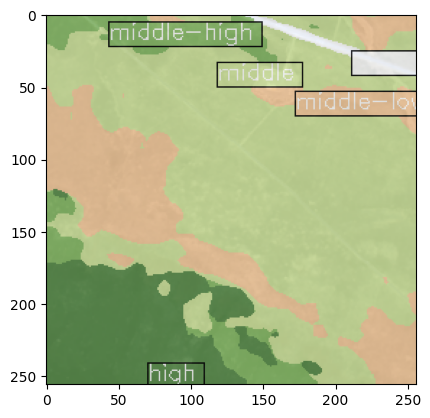

In [36]:
plt.imshow(color_image_pred)

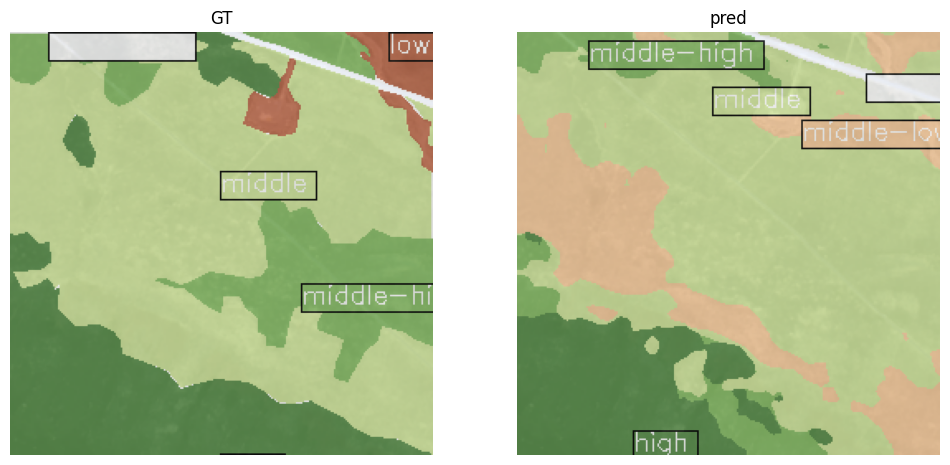

In [38]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(color_image_gt)
plt.axis("off")
plt.title("GT")

plt.subplot(1,2,2)
plt.imshow(color_image_pred)
plt.axis("off")
plt.title("pred")

plt.show()

In [42]:
from mmseg.utils.draw import give_colors_to_mask

In [46]:
palette

[[255, 255, 255],
 [185, 101, 71],
 [248, 202, 155],
 [211, 232, 158],
 [138, 191, 104],
 [92, 144, 77]]

In [47]:
my_draw = give_colors_to_mask(image,mask,colors=[tuple(color) for color in palette])

(-0.5, 255.5, 255.5, -0.5)

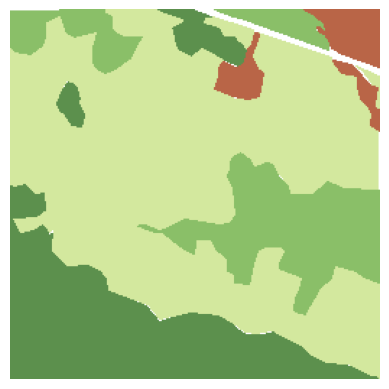

In [49]:
plt.imshow(my_draw)
plt.axis("off")